### Sampling Distributions 

In [29]:
import numpy as np
import math
np.random.seed(42)
coin_toss = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0]) #coin toss simulation
%matplotlib inline

In [3]:
a = np.random.choice(len(coin_toss),8)
coin_toss.mean() 

0.7142857142857143

In [4]:
coin_toss[a].mean()

0.5

In [5]:
sample_props =[]
for i in range(10000):
    a = np.random.choice(len(coin_toss),8)
    sample_props.append(a)
sample_props = np.array(sample_props)

In [6]:
means =[]
for i in range(10000):
    means.append(coin_toss[sample_props[i]].mean())
means = np.array(means)
total_mean= means.mean()
print(total_mean)

0.7141625


In [7]:
print(coin_toss.std())
print(coin_toss.var())

0.45175395145262565
0.20408163265306126


In [8]:
print(means.std())
print(means.var())

0.1608329446778551
0.02586723609375


In [9]:
print(0.7142857142857143*(1-0.7142857142857143)) #p(1-p)
print(0.7142857142857143*(1-0.7142857142857143)/8) #p(1-p)/n

0.20408163265306123
0.025510204081632654


In [10]:
##Simulate your 20 draws
mean_20 =[]
for i in range(10000):
    a = np.random.choice(len(coin_toss),20)
    mean_20.append(a.mean())
mean_20 = np.array(mean_20)

(array([   9.,   83.,  391.,    0., 1232., 2413.,    0., 3014., 2156.,
         702.]),
 array([0.125 , 0.2125, 0.3   , 0.3875, 0.475 , 0.5625, 0.65  , 0.7375,
        0.825 , 0.9125, 1.    ]),
 <a list of 10 Patch objects>)

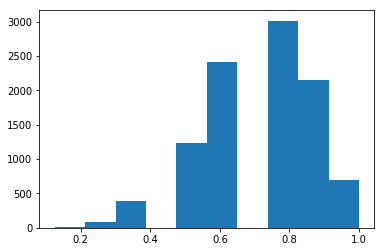

In [13]:
import matplotlib.pyplot as plt
plt.hist(means)

(array([  30.,  189.,  751., 1911., 2798., 2507., 1313.,  419.,   77.,
           5.]),
 array([ 5.25 ,  6.245,  7.24 ,  8.235,  9.23 , 10.225, 11.22 , 12.215,
        13.21 , 14.205, 15.2  ]),
 <a list of 10 Patch objects>)

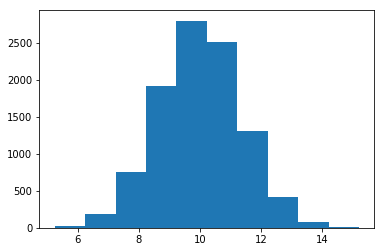

In [17]:
plt.hist(mean_20)

### Central Limit Theorem 

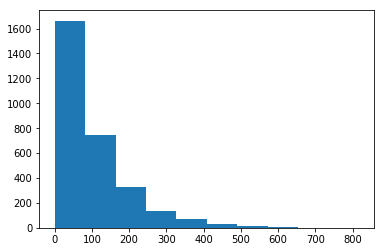

In [18]:
pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

In [19]:
means_size_3=[]
for i in range(10000):
    a = np.random.choice(len(pop_data),3)
    means_size_3.append(pop_data[a].mean())

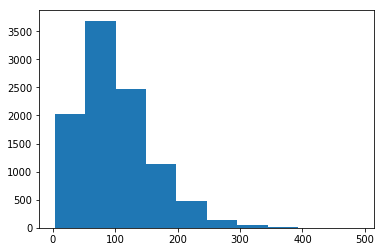

In [20]:
means_size_3 = np.array(means_size_3)
plt.hist(means_size_3);

In [21]:
print(means_size_3.mean())
print(means_size_3.std())

100.86128281310164
57.72519536610306


In [22]:
means_size_100=[]
for i in range(10000):
    a = np.random.choice(len(pop_data),100)
    means_size_100.append(pop_data[a].mean())

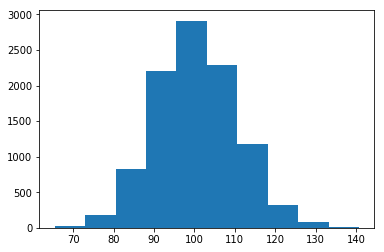

In [23]:
means_size_100 = np.array(means_size_100)
plt.hist(means_size_100);

In [24]:
print(means_size_100.std()**2)
print(means_size_100.mean())

100.32344298232451
100.42914539368782


### Bootstrap Sampling

In [25]:
import numpy as np
np.random.seed(42)

die_vals = np.array([1,2,3,4,5,6])

In [26]:
np.random.choice(die_vals, size=20)

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4])

In [27]:
np.random.choice(die_vals, replace=False, size=6)

array([6, 3, 2, 4, 1, 5])

## Confidence Intervals 

In [32]:
import pandas as pd
np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [34]:
coffee_true = coffee_full.loc[coffee_full['drinks_coffee']]
coffee_false = coffee_full.loc[~coffee_full['drinks_coffee']]
print(len(coffee_true)/len(coffee_full))
print(len(coffee_false)/len(coffee_full))

0.589778076664425
0.410221923335575


In [35]:
print(coffee_true.height.mean())
print(coffee_false.height.mean())

68.40021025548401
66.44340776214705


In [36]:
height_list =[]
for i in range(10000):
    coffee_new = coffee_red.sample(200,replace=True)
    coffee_false = coffee_new.loc[~coffee_new['drinks_coffee']]
    height_list.append(coffee_false.height.mean())

In [38]:
height_list = np.array(height_list)
np.percentile(height_list,2.5),np.percentile(height_list,97.5),

(65.9929132815752, 67.58402738281573)

### The actual confidence interval

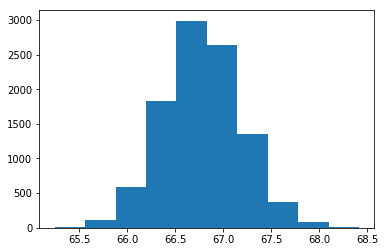

In [37]:
import matplotlib.pyplot as plt
plt.hist(height_list);

### Confidence Interval - Difference In Means

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
small_sample = full_data.sample(200)

In [14]:
confidence_interval_coffee=[]
for i in range(10000):
    sampled_data = small_sample.sample(200, replace = True)
    sampled_true = sampled_data[sampled_data["drinks_coffee"]].height.mean()
    sampled_false = sampled_data[~sampled_data["drinks_coffee"]].height.mean()
    confidence_interval_coffee.append(sampled_true-sampled_false)

In [15]:
confidence_interval_age=[]
for i in range(10000):
    sampled_data = small_sample.sample(200, replace = True)
    sampled_true = sampled_data.loc[sample_data['age'] == '>=21'].height.mean()
    sampled_false = sampled_data.loc[sample_data['age'] == '<21'].height.mean()
    confidence_interval_age.append(sampled_true-sampled_false)

In [16]:
confidence_interval_age = np.array(confidence_interval_age)
np.percentile(confidence_interval_age,0.5),np.percentile(confidence_interval_age,99.5),

(3.3652749452554795, 5.0932450670661495)

In [18]:
confidence_interval_coffee_old =[]
for i in range(10000):
    sampled_data = small_sample.sample(200, replace = True)
    sampled_data = sampled_data.loc[sample_data['age'] == '>=21']
    sampled_true = sampled_data[sampled_data["drinks_coffee"]].height.mean()
    sampled_false = sampled_data[~sampled_data["drinks_coffee"]].height.mean()
    confidence_interval_coffee_old.append(sampled_true-sampled_false)

confidence_interval_coffee_young =[]
for i in range(10000):
    sampled_data = small_sample.sample(200)
    sampled_data = sampled_data.loc[sample_data['age'] == '<21']
    sampled_true = sampled_data[sampled_data["drinks_coffee"]].height.mean()
    sampled_false = sampled_data[~sampled_data["drinks_coffee"]].height.mean()
    confidence_interval_coffee_young.append(sampled_true-sampled_false)

In [19]:
confidence_interval_coffee_young = np.array(confidence_interval_coffee_young)
np.percentile(confidence_interval_coffee_young,2.5),np.percentile(confidence_interval_coffee_young,97.5),

(-1.8493493676082764, -1.8493493676082053)

In [20]:
confidence_interval_coffee_old =[]
for i in range(10000):
    sampled_data = small_sample.sample(200, replace = True)
    sampled_data = sampled_data.loc[sample_data['age'] == '>=21']
    sampled_true = sampled_data[sampled_data["drinks_coffee"]].height.mean()
    sampled_false = sampled_data[~sampled_data["drinks_coffee"]].height.mean()
    confidence_interval_coffee_old.append(sampled_true-sampled_false)

In [21]:
confidence_interval_coffee_old = np.array(confidence_interval_coffee_old)
np.percentile(confidence_interval_coffee_old,2.5),np.percentile(confidence_interval_coffee_old,97.5),

(-4.4056118751261355, -1.8334672523181537)